In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('calenviroscreen-3.0-results-june-2018-update.csv')
data.columns = data.columns.str.strip()
data.head()

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.09,100.00,95-100% (highest scores),...,77.51,76.3,97.12,17.6,91.72,26.0,79.40,92.12,9.55,99.70
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.68,99.99,95-100% (highest scores),...,96.25,72.5,94.63,12.3,71.82,34.1,93.75,87.44,9.07,98.11
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.97,99.97,95-100% (highest scores),...,78.39,86.8,99.56,16.1,87.98,40.1,97.85,94.58,9.81,99.99
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.49,99.96,95-100% (highest scores),...,75.14,61.3,85.57,19.6,94.97,21.1,63.54,86.70,8.99,97.72
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.03,99.95,95-100% (highest scores),...,73.72,66.4,90.23,18.6,93.65,28.1,83.98,80.08,8.30,92.76


In [16]:
# Exclude non-numeric columns from correlation matrix calculation
numeric_data = data.select_dtypes(include=['int64', 'float64'])

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define the pipeline
pipeline = Pipeline([
    # Step 1: Impute missing values with mean for numeric columns
    ('imputer_numeric', SimpleImputer(strategy='mean')),
])

# List of numeric columns with missing values
numeric_columns_with_missing = [
    'CES 3.0 Score', 'CES 3.0 Percentile', 'PM2.5', 'PM2.5 Pctl', 'Drinking Water',
    'Drinking Water Pctl', 'Traffic', 'Traffic Pctl', 'Low Birth Weight',
    'Low Birth Weight Pctl', 'Education', 'Education Pctl', 'Linguistic Isolation',
    'Linguistic Isolation Pctl', 'Poverty', 'Poverty Pctl', 'Unemployment',
    'Unemployment Pctl', 'Housing Burden', 'Housing Burden Pctl', 'Pop. Char.',
    'Pop. Char. Score', 'Pop. Char. Pctl'
]

# Fit the pipeline to the data
pipeline.fit(numeric_data[numeric_columns_with_missing])#

# Transform the data
data_transformed = pipeline.transform(numeric_data[numeric_columns_with_missing])

# Convert the transformed data back to DataFrame
data_transformed_df = pd.DataFrame(data_transformed, columns=numeric_columns_with_missing)

# Replace the original columns with the transformed columns in the original DataFrame
numeric_data[numeric_columns_with_missing] = data_transformed_df

# Check if there are any missing values left
print(numeric_data.isnull().sum())


Census Tract                   0
Total Population               0
ZIP                            0
Longitude                      0
Latitude                       0
CES 3.0 Score                  0
CES 3.0 Percentile             0
Ozone                          0
Ozone Pctl                     0
PM2.5                          0
PM2.5 Pctl                     0
Diesel PM                      0
Diesel PM Pctl                 0
Drinking Water                 0
Drinking Water Pctl            0
Pesticides                     0
Pesticides Pctl                0
Tox. Release                   0
Tox. Release Pctl              0
Traffic                        0
Traffic Pctl                   0
Cleanup Sites                  0
Cleanup Sites Pctl             0
Groundwater Threats            0
Groundwater Threats Pctl       0
Haz. Waste                     0
Haz. Waste Pctl                0
Imp. Water Bodies              0
Imp. Water Bodies Pctl         0
Solid Waste                    0
Solid Wast

In [18]:
correlation_matrix = numeric_data.corr()
print(correlation_matrix)


                             Census Tract  Total Population       ZIP  \
Census Tract                     1.000000          0.092702  0.108162   
Total Population                 0.092702          1.000000  0.068548   
ZIP                              0.108162          0.068548  1.000000   
Longitude                       -0.049371          0.044482 -0.389320   
Latitude                         0.042883         -0.036000  0.428458   
CES 3.0 Score                   -0.187310          0.043251 -0.149865   
CES 3.0 Percentile              -0.184058          0.056715 -0.145636   
Ozone                           -0.041672          0.081119 -0.122336   
Ozone Pctl                      -0.060062          0.073204 -0.117682   
PM2.5                           -0.156067          0.049385 -0.187019   
PM2.5 Pctl                      -0.152997          0.022132 -0.250125   
Diesel PM                       -0.169529         -0.092283 -0.076206   
Diesel PM Pctl                  -0.251641         -

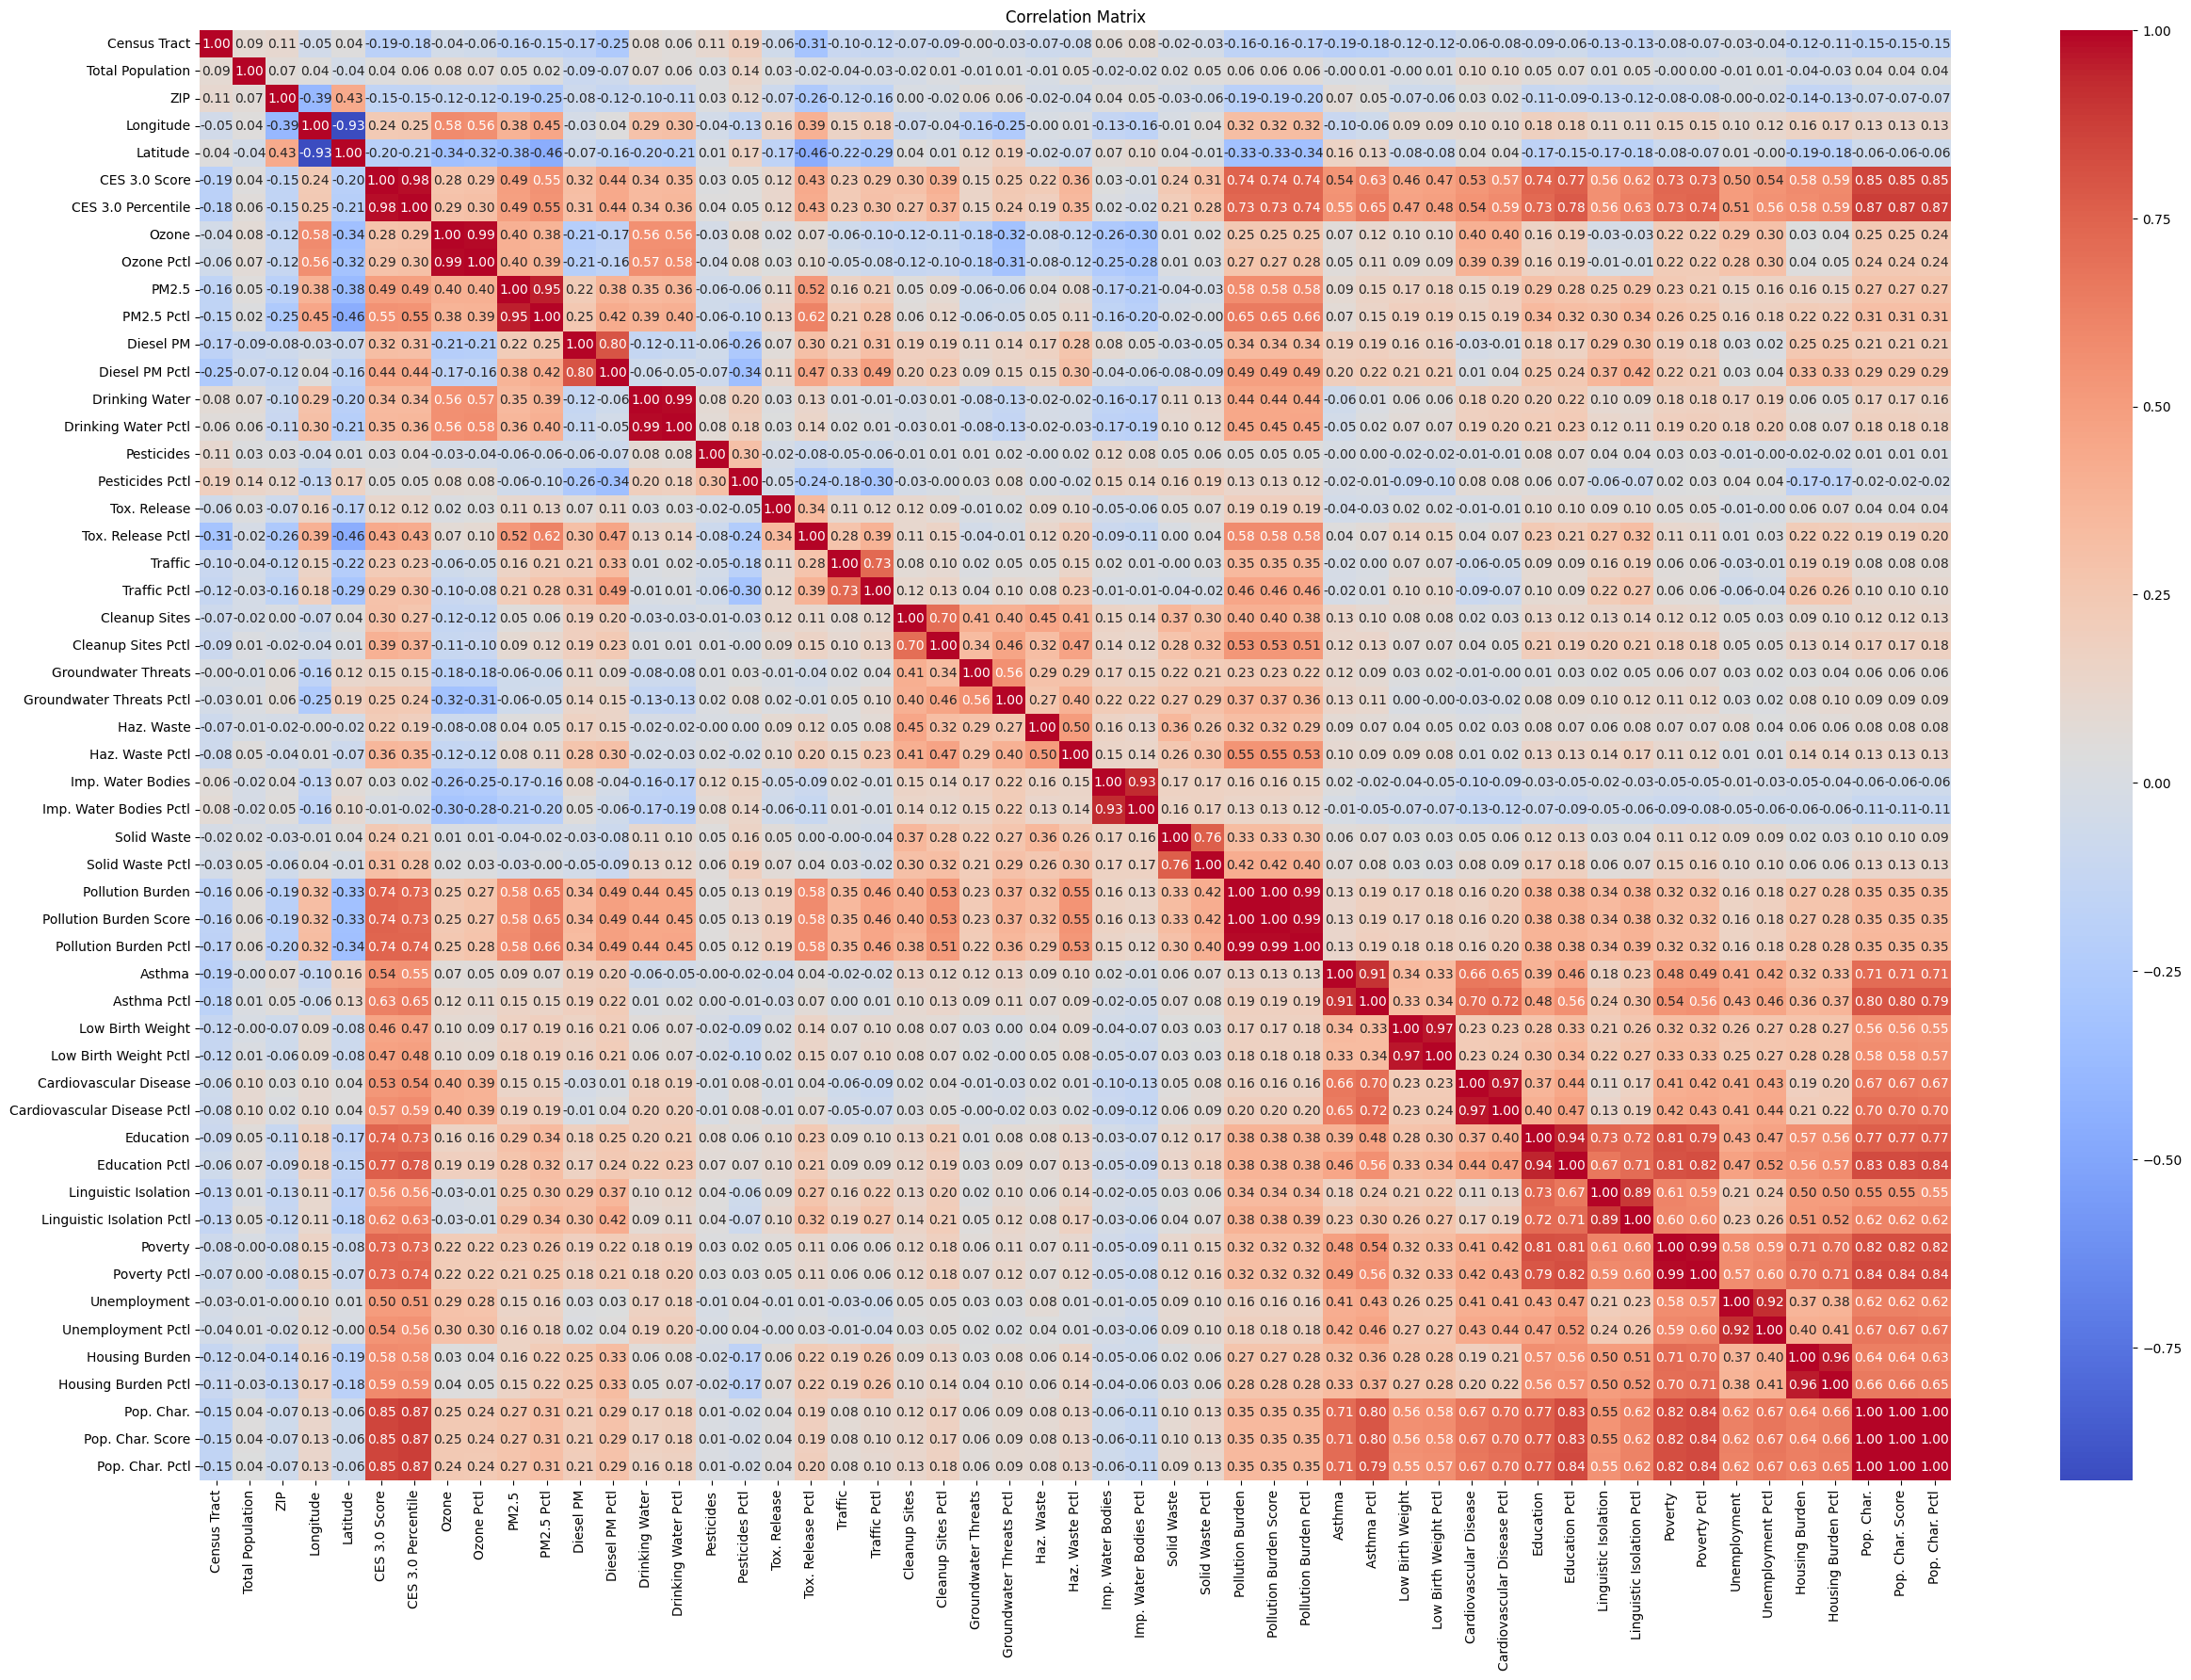

In [22]:
# Heatmap for visualization of correlation matrix
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [20]:
# Select the top 8 features highly correlated with CES 3.0
top_8_features = correlation_matrix['CES 3.0 Score'].sort_values(ascending=False)[1:9]

# Print the top 8 features
print(top_8_features)


CES 3.0 Percentile        0.977641
Pop. Char.                0.853018
Pop. Char. Score          0.852999
Pop. Char. Pctl           0.852305
Education Pctl            0.765944
Pollution Burden          0.744390
Pollution Burden Score    0.744379
Education                 0.742317
Name: CES 3.0 Score, dtype: float64
